In [ ]:
#Here we mount the Google Drive and allow the Titanic.csv files to used in the code
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Step 1 import the required libraries for EDA
#Here we import required packages for Exploratory Data Analysis 
#The "import os" imports the os module which provides a way to interact with the operating system, thus allowing us to read/write/handle directories. 
import os

#The "import pandas" command import the pandas library, pandas is used in data manipulation in Python
import pandas as pd

#The "import numpy" command imports the numpy library, which is used in numeric computation.
import numpy as np

#The "import matoplotlib.pylot" command imports matplotlib.pyplot library  for plotting and creating visualizations Python.
import matplotlib.pyplot as plt

#The "import seabor" command is used to import seaborn which is a library also for data visualization. 
import seaborn as sns

#The "missingno" command imports the missingno library, which is used for visualizing missing data.
import missingno as msno 

#The "import plotly.graph_objects" command imports the import plotly.graph_objects module, this module is used in creating interactive plots in Python
import plotly.graph_objects as go 

#The "import plotly.express" command imports the plotly.express module which is used for creating interactive visualizations.
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Step 2 REad teh data set
#Here we import and read the dataset (train.csv) for the Titanic topic
#this data set will be used in traninig the algorithm.

df = pd.read_csv('/content/drive/MyDrive/MyCapstoneProject/train.csv')


In [ ]:
#Step 3
#Here we are instructing the dataset to show us the first 5 rows.
df.head() #display the first 5 rows

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
#Here we are instructing the dataset to show us the last 5 rows.
df.tail() #display the last 5 rows

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
#Step 3 Exploratory Data Analysis
#The "shape" method is applied to the dataframe to show the number of rows and columns
#rows are the observations (data) and the columns are the attributes.

df.shape


(891, 12)

In [ ]:
#Descriptive Statistics
#The desribe() method in Pandas is used to describe the data in the dataframe
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
#Correlation
#The code df.corr(method = "pearson") calculates the Pearson correlation 
#coefficient between all pairs of columns in the DataFrame
#The Pearson correlation coefficient is a measure of the  correlation between two variables, it ranges from -1 to 1, 
#with "-1" indicating a  negative correlation, "0" indicating no correlation, 
#and "1" indicating a positive correlation.
df.corr(method = "pearson")

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [ ]:
#The columns attribute is used to retrieve the names of the attributes/columns.
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#The nunique() method is used to count the unique values for each column.
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
#The info() method prints out complete information about the dataframe.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


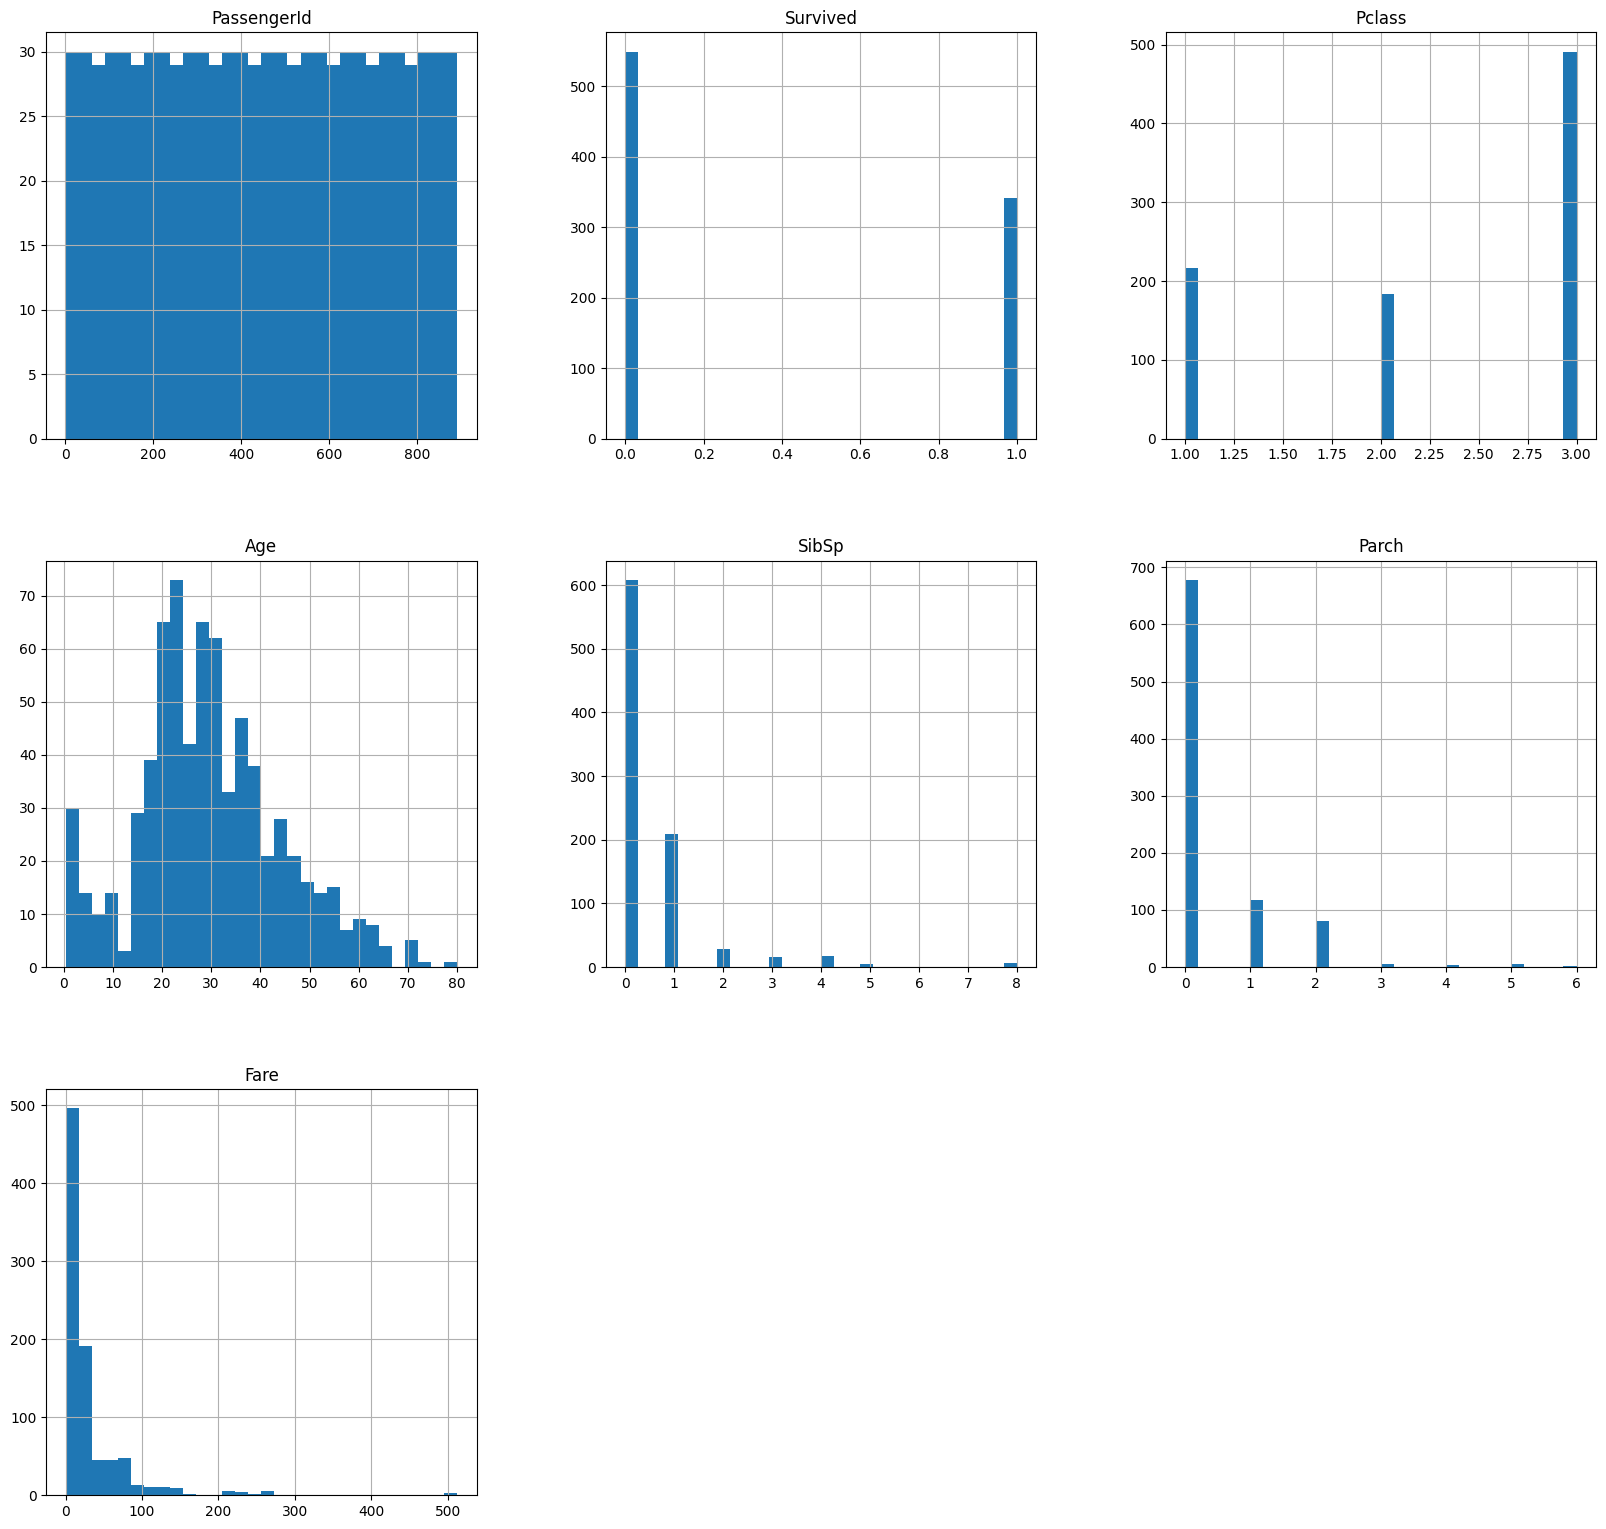

In [ ]:
#Here we will be displaying data related to attributes in their own bar graphs
#The variable "fig" is used to create a new figure object with the plt.figure() function. the figure size is 20 and 19 
fig = plt.figure(figsize =(20,19))

#The "ax" variable creates an instance of the current axes of figure using the get current axes (gca()) function.
ax=fig.gca()

#This line is used to create a histrogram of each column in the train.csv dataframe using the hist() function.
#What is a histogram? Histograms are used to provide a visual interpretation of numerical data.
df.hist(ax=ax,bins =30)

#This line shows the histograms 
plt.show()


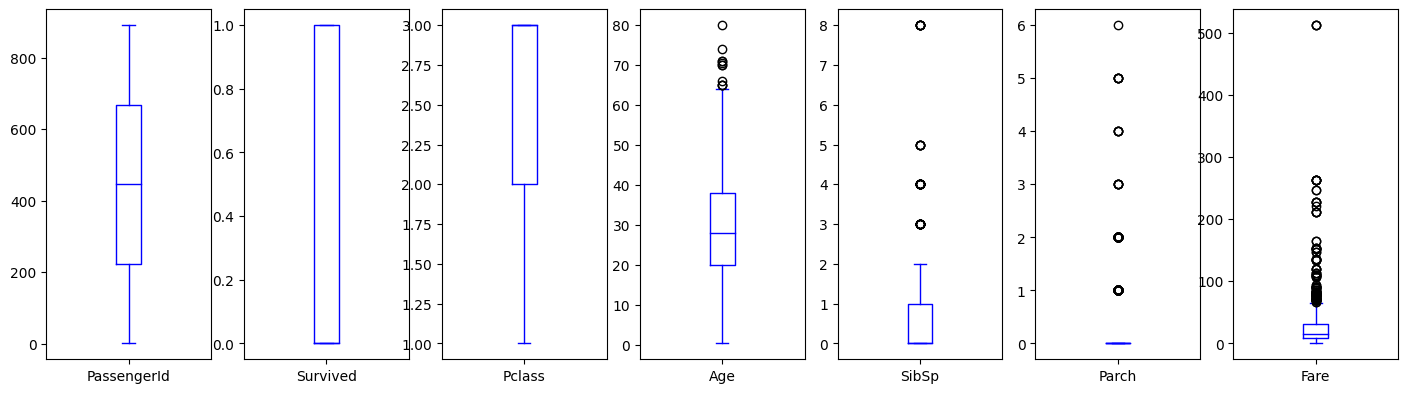

In [ ]:
#Here we are using a box-plot diagram for detecting outliers.
#Outliers are data that deviates from the rest of the data.
df.plot(kind='box', subplots=True, 
        layout=(2,8),sharex=False,sharey=False, figsize=(20, 10), color='blue');


In [ ]:
#Here we will identify the outliers and specify them in a list.
continous_features = ['Age','SibSp','Parch', 'Fare']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])

For the feature Age, No of Outliers is 891
For the feature SibSp, No of Outliers is 46
For the feature Parch, No of Outliers is 213
For the feature Fare, No of Outliers is 116


In [ ]:
#Here we remove the outlier data from the dataset.
#outliers(df[continous_features], drop = True)

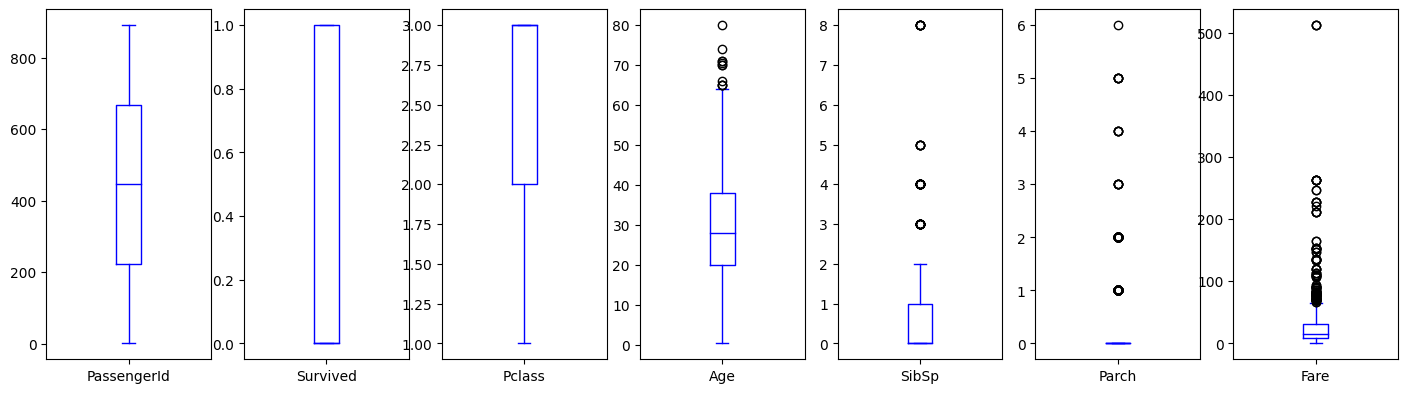

In [ ]:
#Here we check if outliers got removed the dataset.
#The outliers removal doesn't seem to have worked, so this was not a success!!!
df.plot(kind='box', subplots=True, 
        layout=(2,8),sharex=False,sharey=False, figsize=(20, 10), color='blue');


In [ ]:
#Here we check data shape after outlier removal, we can see it did not work,
#because the value is the same as when it was exectuted further back in the code.
df.shape


(891, 12)

0    549
1    342
Name: Survived, dtype: int64


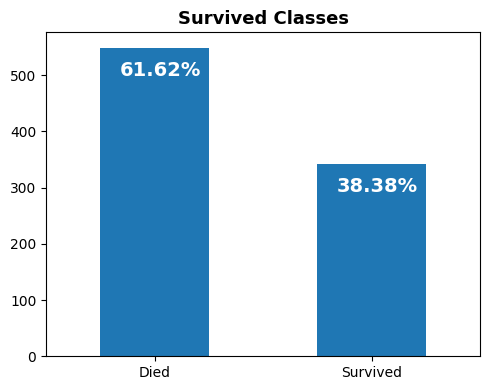

In [ ]:
#Question 1: What are the 2 classes for this dataframe?
#Here I have answered Question 1 by identifying what are the 2 classes associated with this data frame.
#Here we are checking the value distribution between 2 classes "Died",
# and "Survived", we are using this to calculate the percentage of people,
#who died and survived.
print(df.Survived.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Died", "Survived"]
ax = df.Survived.value_counts().plot(kind='bar')
ax.set_title("Survived Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

#Question 2: What percentage of people survived and died?
# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

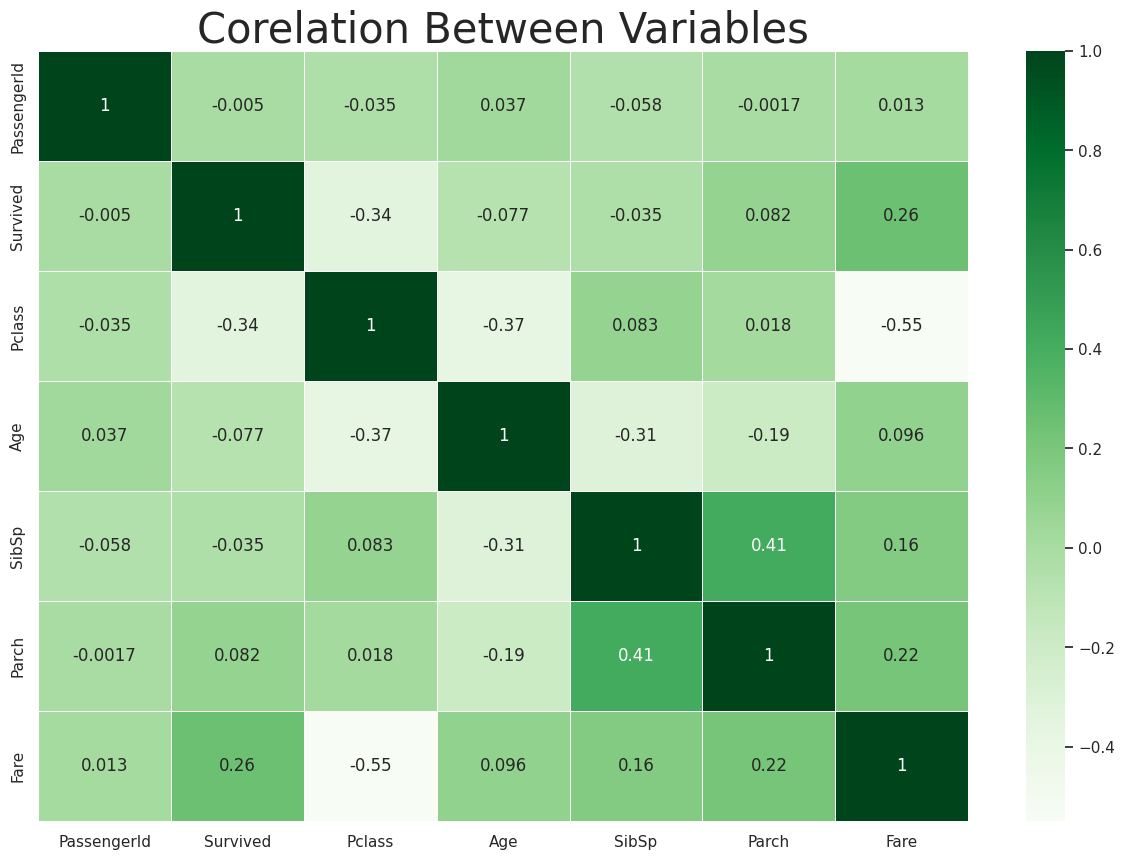

In [ ]:
#The purpose of this code is to create a heatmap using Seaborn library to 
#visualize the correlation between variables in the dataframe. 
#The .corr() function calculates the correlation between all pairs of variables in the dataframe.
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Greens")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

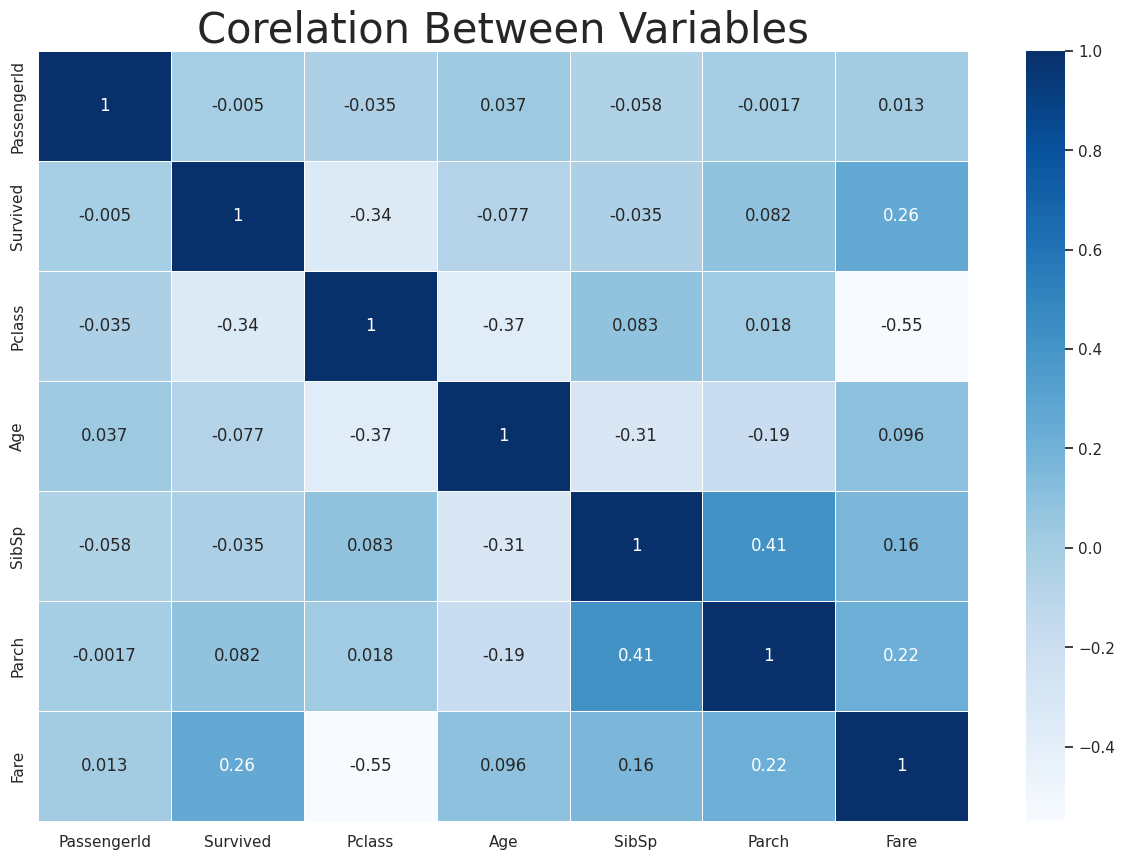

In [ ]:
#I did this again in blue because it looks nicer in blue!
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [ ]:
#The lecture on the 6th April 2023 said we can install this code and run it, so I will be doing it here.
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 22.4 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=c9c336c75c00d8206ca0b096262e526e60eb5fb75fcf543d76d6e432e2cae1e7
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
#I will be using the code above to obtain a full profiler report.
#I've restarted the kernel
#I've re-run and imported libraries and dataframe.
#I will be using this code to generate an interactive HTML report using the 
#pandas_profiling library to perform EDA on the dataframe.
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Titanic Survival EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()

#Question 3: Which sex comprised the majority of hte passengers?
#Answer: Males comprised the majority of the passengers.

#Question 4: From which port did the majority of passengers depart?
#Answer: Southampton was the port from which the majority of passengers departed from.

#Question 5: To which Passenger Class did the majority of passengers belong to? 
#Answer: The majority of passengers belonged to PClass 3


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#This is the Predictive Data Analytics Stage
#From here we perform pre-processing and normalization.
#What is pre-processing?
#Data preprocessing is a step in the data mining and data analysis process that 
#takes raw data and transforms it into a format that can be understood and 
#analyzed by computers and machine learning. [3]

In [ ]:
#What is normalization?
#Data normalization is considered the development of clean data. [4]

In [ ]:
#Pre-processing
#from sklearn.exceptions we import the "DataDimensionalityWarning" which is a warning raised by scikit-learn,
#scikit-learn is a popular machine learning library in Python.
#High Dimensional data means that the number of dimensions are high, this makes calculation extremely difficult. 
#This warning is meant to alert the user that the input data may be too high-dimensional, which could potentially impact the performance of the model or increase the computational overhead.
from sklearn.exceptions import DataDimensionalityWarning


In [ ]:
#Encode object columns to integers
#The purpose of this code is to encode the object columns of a dataframe into integer values using scikit-learn's OrdinalEncoder class
#We import the preprocessing library from sklearn
from sklearn import preprocessing

#Then we import the OrdinalEncoder from the preprocessing library
from sklearn.preprocessing import OrdinalEncoder

#Here we use the "OrdinalEncoder" with a for loop to encode categorical features with ordered values into numeric integers.
for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df

PassengerId  Survived  Pclass   Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3  108.0  1.0  22.0      1      0   523.0   
1              2         1       1  190.0  0.0  38.0      1      0   596.0   
2              3         1       3  353.0  0.0  26.0      0      0   669.0   
3              4         1       1  272.0  0.0  35.0      1      0    49.0   
4              5         0       3   15.0  1.0  35.0      0      0   472.0   
..           ...       ...     ...    ...  ...   ...    ...    ...     ...   
886          887         0       2  548.0  1.0  27.0      0      0   101.0   
887          888         1       1  303.0  0.0  19.0      0      0    14.0   
888          889         0       3  413.0  0.0   NaN      1      2   675.0   
889          890         1       1   81.0  1.0  26.0      0      0     8.0   
890          891         0       3  220.0  1.0  32.0      0      0   466.0   

        Fare  Cabin  Embarked  
0     7.2500    NaN       2.0  
1    71.2833   81.0       0.0  
2     7.9250    NaN       2.0  
3    53.1000   55.0       2.0  
4     8.0500    NaN       2.0  
..       ...    ...       ...  
886  13.0000    NaN       2.0  
887  30.0000   30.0       2.0  
888  23.4500    NaN       2.0  
889  30.0000   60.0       0.0  
890   7.7500    NaN       1.0  

[891 rows x 12 columns]

In [ ]:
#Here we normalize the data. 

#Here we create a new variable and assign it to the Survived Column of the dataframe.
class_label =df['Survived']

#Here we drop the Survived column from the dataframe.
df = df.drop(['Survived'], axis =1)

#Here we normalize the data.
df = (df-df.min())/(df.max()-df.min())

#Here we add the "Survived" column back to the dataframe.
df['Survived']=class_label

#This is used to display the dataframe.
df

PassengerId  Pclass      Name  Sex       Age  SibSp     Parch    Ticket  \
0       0.000000     1.0  0.121348  1.0  0.271174  0.125  0.000000  0.769118   
1       0.001124     0.0  0.213483  0.0  0.472229  0.125  0.000000  0.876471   
2       0.002247     1.0  0.396629  0.0  0.321438  0.000  0.000000  0.983824   
3       0.003371     0.0  0.305618  0.0  0.434531  0.125  0.000000  0.072059   
4       0.004494     1.0  0.016854  1.0  0.434531  0.000  0.000000  0.694118   
..           ...     ...       ...  ...       ...    ...       ...       ...   
886     0.995506     0.5  0.615730  1.0  0.334004  0.000  0.000000  0.148529   
887     0.996629     0.0  0.340449  0.0  0.233476  0.000  0.000000  0.020588   
888     0.997753     1.0  0.464045  0.0       NaN  0.125  0.333333  0.992647   
889     0.998876     0.0  0.091011  1.0  0.321438  0.000  0.000000  0.011765   
890     1.000000     1.0  0.247191  1.0  0.396833  0.000  0.000000  0.685294   

         Fare     Cabin  Embarked  Survived  
0    0.014151       NaN       1.0         0  
1    0.139136  0.554795       0.0         1  
2    0.015469       NaN       1.0         1  
3    0.103644  0.376712       1.0         1  
4    0.015713       NaN       1.0         0  
..        ...       ...       ...       ...  
886  0.025374       NaN       1.0         0  
887  0.058556  0.205479       1.0         1  
888  0.045771       NaN       1.0         0  
889  0.058556  0.410959       0.0         1  
890  0.015127       NaN       0.5         0  

[891 rows x 12 columns]

In [ ]:
#Here we are transforming them, preparing them for model building.
#Pre-processing

#Here we copy the dataframe and assign it to a variable called "titanic_data". We do this to avoid changing the original dataframe.
titanic_data = df.copy()

#"le" is a variable used to create an instance of hte "LabelEncoder" class which is used to encode category variables into numeric values.
le = preprocessing.LabelEncoder()

#The "passengerID" variable is used to apply label encoding on the "PassengerId" column. 
passengerId = le.fit_transform(list(titanic_data["PassengerId"]))

#The "pclass" variable is used to apply label encoding on the Pclass column
pclass = le.fit_transform(list(titanic_data["Pclass"]))

#The "name" variable is used to apply label encoding on the Name columne
name = le.fit_transform(list(titanic_data["Name"])) 

#The "sex" variable is used to apply label encoding on the Sex column
sex = le.fit_transform(list(titanic_data["Sex"]))

#The "age" variable is used to apply label encoding on the Age column
age = le.fit_transform(list(titanic_data["Age"])) 

#The "sibSp" variable is used to apply label encoding on the SibSp column
sibSp = le.fit_transform(list(titanic_data["SibSp"]))

#The "parch" variable is used to apply label encoding on the Parch column
parch = le.fit_transform(list(titanic_data["Parch"])) 

#The "ticket" variable is used to apply label encoding on the Ticket column
ticket = le.fit_transform(list(titanic_data["Ticket"]))

#The "fare" variable is used to apply label encoding on the Fare column
fare = le.fit_transform(list(titanic_data["Fare"]))

#The "cabin" variable is used to apply label encoding on the Cabin column 
cabin = le.fit_transform(list(titanic_data["Cabin"]))

#The "embarked" variable is used to apply label encoding on the Embarked column
embarked = le.fit_transform(list(titanic_data["Embarked"]))

#The "survived" variable is used to apply label encoding on the Survived column
survived = le.fit_transform(list(titanic_data["Survived"]))


In [ ]:
#Model Preparation and Development

#This x variable is used for zipping the encoded values together using hte zip() function. These will be used as inputs.
x = list(zip(passengerId, pclass, name, sex, age, sibSp, parch, ticket, fare, cabin, embarked))

#This y variable is used to create a list of encoded values to be used for the prediction.
#this is the output.
y = list(survived)


# num of folds means that the data set will be split into 4 equal parts for training/testing.
num_folds = 4

# the seed is used to for random number generation.
seed = 7

#we use the term accuracy to define how accurate our model is
scoring = 'accuracy'

In [ ]:
# Model Test/Train
#We import the sklearn.model_selection to split hte data into training and test sets for model evaluation.
import sklearn.model_selection

#x contains the attributes for that will be used in predictions and y contains the target variables.
#The test_size parameter is used to specify the percentage of the data that will be used for testing which is 20%
#The random_state parameter is used to set the random seed to 7 as declared above for random number generation.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#this splits 20% of our data into test samples.

In [ ]:
#This code is used to see the size of train and test subsets after splitting.
np.shape(x_train), np.shape(x_test)


((712, 11), (179, 11))

In [ ]:
#Predictive analytics model development by comparing different Scikit-learn classification algorithms
#HEre we're comparing differet analytical models and seeing which one is best.

#HEre we import the StandardScaler class, which is used for standardizing the features of the dataset.
from sklearn.preprocessing import StandardScaler

#HEre we import the train_test_split function, which is used to split the dataset into training and testing subsets for model evaluation and testing.
from sklearn.model_selection import train_test_split

#HEre we import the KFold class, which is used to evaluate the performance of machine learning models.
from sklearn.model_selection import KFold

#HEre we import the cross_val_scord function, which is used to perform cross validtion and check accuracy.
from sklearn.model_selection import cross_val_score

#HEre we import the GridSearcCV class, which is used to perform grid searching with cross validation.
from sklearn.model_selection import GridSearchCV

#HEre we import the classification_report function, which is used to generate a report of classification metrics.
from sklearn.metrics import classification_report

#HEre we import the confusion_matrix function, and ConfusionMatrixDisplay class which is used to display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#HEre we import the accuracy_score function, which is used in calculating accuracy of a classification model or models.
from sklearn.metrics import accuracy_score

#HEre we import the Pipeline class, which is used for combining multiple steps in the machine learning workflow.
from sklearn.pipeline import Pipeline

#HEre we import the LogisticRegression class, which is used for binary and multi-class classification problems.
from sklearn.linear_model import LogisticRegression

#HEre we import the DecisiongTreeClassifier class, which is used for  decision tree based problems.
from sklearn.tree import DecisionTreeClassifier

#HEre we import the KNeighbourClassifier, which is uses the k-nearest algorithm for classification problems.
from sklearn.neighbors import KNeighborsClassifier

#HEre we import the LinearDiscriminatnAnalysis class, to reduce dimensionality.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#HEre we import the GaussianNB class which is used for classification problems.
from sklearn.naive_bayes import GaussianNB

#HEre we import the SVC class which is used for classification problems.
from sklearn.svm import SVC

#HEre we import the AdaBoostClassifier class which is used to combine weak classifiers to create strong classifiers for classification problems.
from sklearn.ensemble import AdaBoostClassifier

#HEre we import the gradientBoostingClassifier class which is an ensemble method that uses boosting to create a strong classifier for classification problems.
from sklearn.ensemble import GradientBoostingClassifier

#HEre we import the randomForestClassifier class it uses decision tress to create strong classifiers for classification problems.
from sklearn.ensemble import RandomForestClassifier

##HEre we import the ExtratreesClassifier class
from sklearn.ensemble import ExtraTreesClassifier



#What is the purpose of these models? The purpose is to compare the performance of different classification algorithms from sklearn
# and evaluate the performance of each model on the training set.


#Here we create an empty list to store the models.
models = []

#These lines of code add/append the models to the empty list.
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn

#HEre we create a list to store accuracy scores for each model.
results = []

#HEre we create a list store the name of the models.
names = []
print("Performance on Training set")

#The for loop will be used to iterate through the list of models and unpacks each tuple into name and model.
for name, model in models:

  #This variable is used to create an instance of the Kfold class with the number of folds and the number of seeds as parameters.
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
DT: 0.758427 (0.014323)

NB: 0.772472 (0.011582)

SVM: 0.662921 (0.018204)

GBM: 0.821629 (0.018791)

RF: 0.821629 (0.014528)



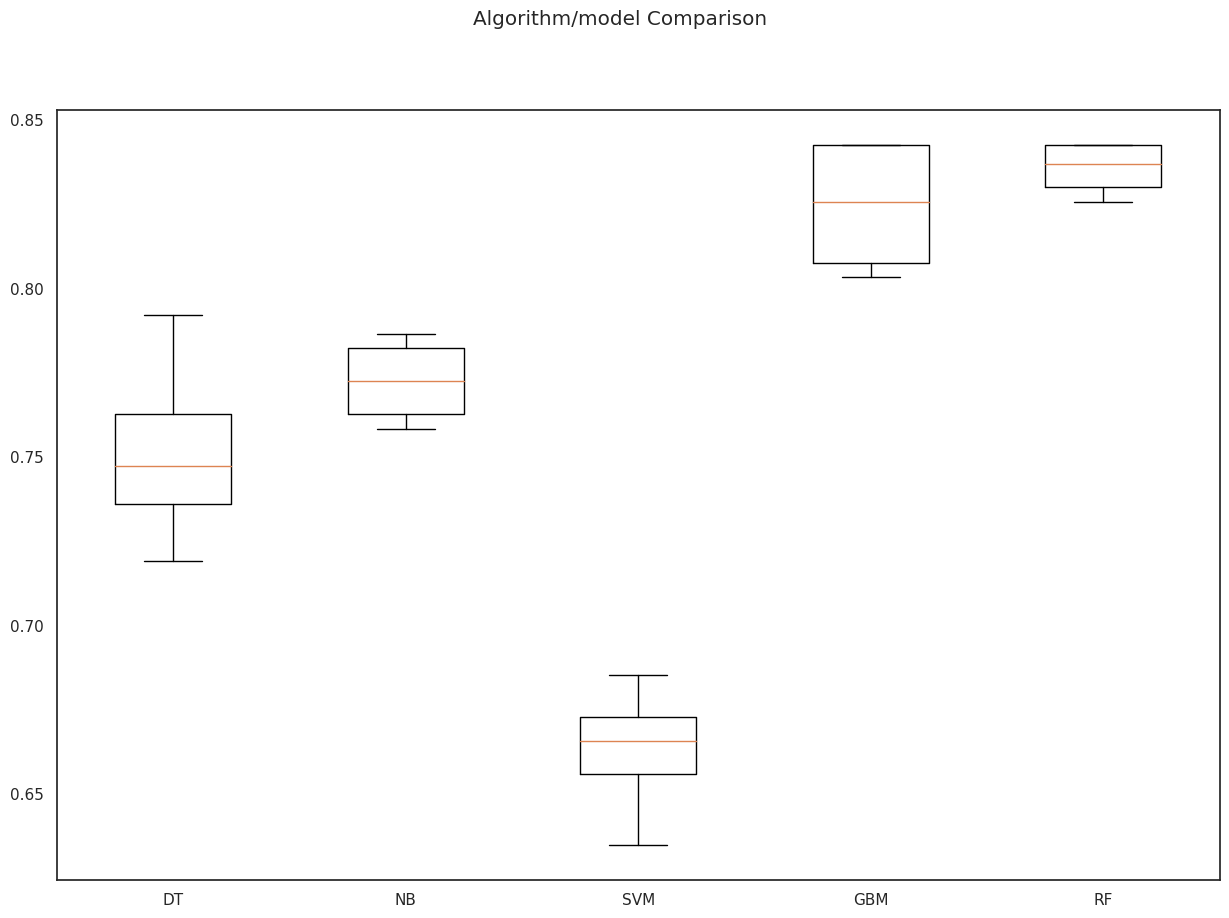

In [ ]:
#Now we will visually compare the model's/algorithm's performance.
#Here we will use a box plot diagram to do that.
fig = plt.figure()
fig.suptitle('Algorithm/model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

#The code below adds all the models to a list to be evaluated.
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))

#the code below initializes the models.
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

#this assigns the GradiaentBoostingClassifier model to the variable best_model
#We see this model performed the best so we assigned it to a variable for use later.
best_model = gb

#Here we fits the training data to the best model, this trains the model on the training data.
best_model.fit(x_train, y_train)

#Here we make predictions on the tested data using hte GradientBoostingClassifier model.
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.8044692737430168


In [ ]:
#Model Performance Evaluation Metric 1 - Classification Report
#this code will be used to generate a report on the performance of hte classification model.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



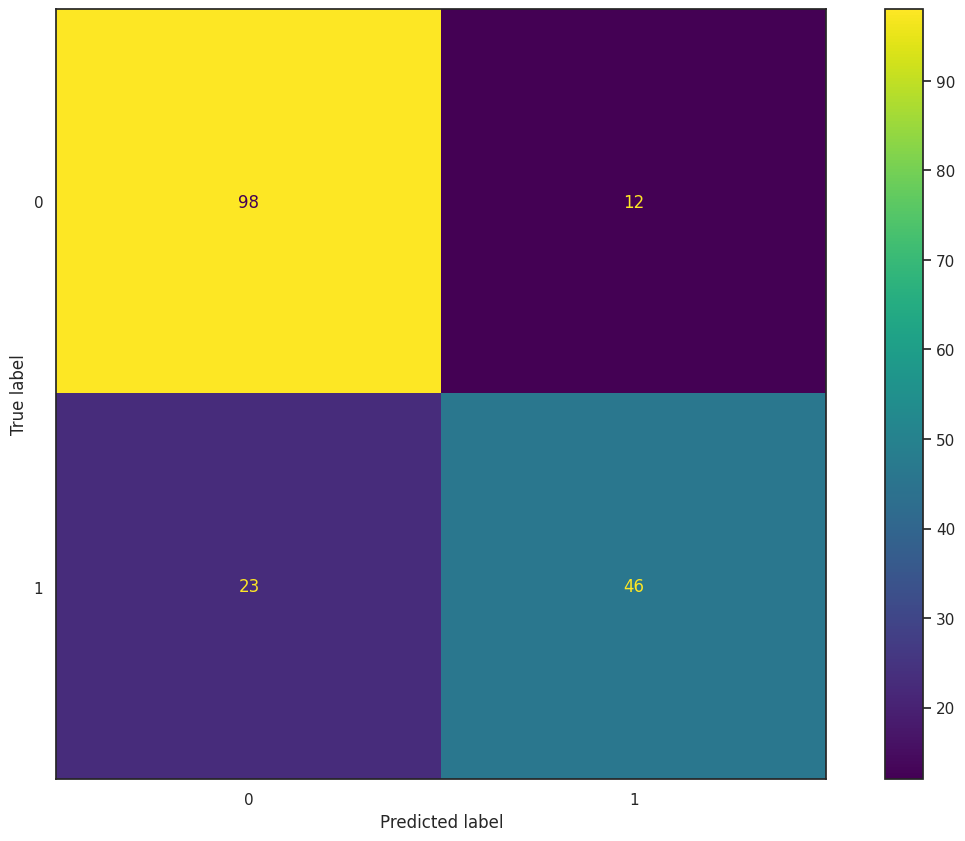

In [ ]:
#Model Performance Evaluation Metric 2 - Confusion matrix 
#Here we import the confusiong_matrix and ConfusionMatrixDisplay classes which will be used for performance evaluation.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#The cm variable will be used to calculate teh confusion matrix for the predicted labels (y_pred) and true labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#The disp variable will be used to create an instance of the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#Here we plot it and show it.
disp.plot()
plt.show()


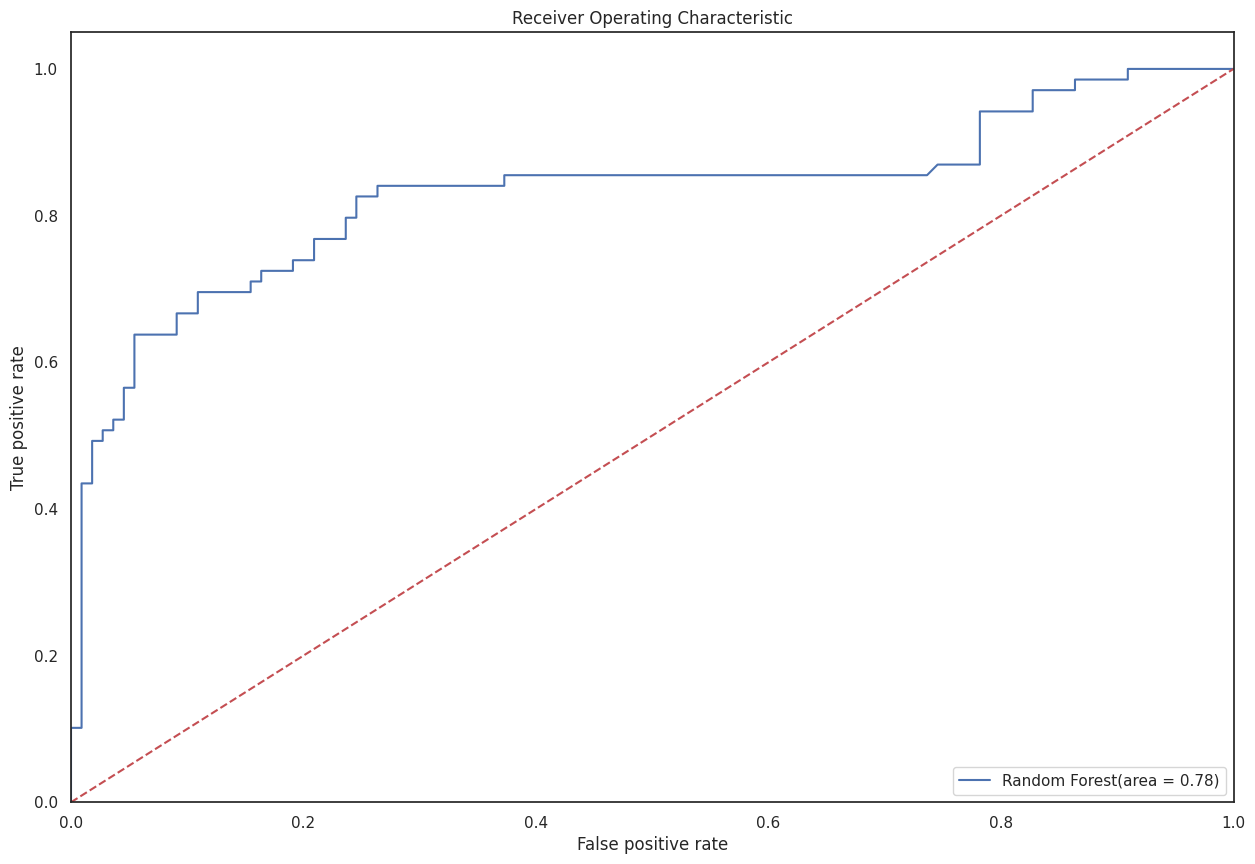

In [ ]:
#Model Evaluation Metric 3- ROC-AUC curve

#these 2 lines of code import the roc_auc_score and roc_curve functions necessary to calculate ROC-AUC score the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#here we assign the best model "GradientBoostingClassifier" to a variable
best_model = gb

#Here we are fitting training data into the best_model variable
best_model.fit(x_train, y_train)

#This line is used to calculate teh ROC-AUC score for the best_model
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))

#Here we calculate the false positive rate, true positive rate and thresholds for the ROC-Curve  
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

#HEre we create a new figure for the ROC curve plot.
plt.figure()

#This line plots the curve using the false positive rate, true positive rate and thresholds
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)

#coordinates and labels are added below.
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [ ]:
#Model Evaluation Metric 4-prediction report
#The purpose of this loop is print out a report on predicted values, 
#actual values, and the corresponding data points for each iteration
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)


Predicted:  0 Actual:  0 Data:  (725, 2, 617, 1, 25, 0, 0, 266, 54, 147, 2)
Predicted:  0 Actual:  0 Data:  (861, 1, 283, 1, 27, 1, 0, 221, 76, 147, 2)
Predicted:  0 Actual:  0 Data:  (528, 2, 725, 1, 52, 0, 0, 250, 41, 147, 2)
Predicted:  0 Actual:  0 Data:  (46, 2, 473, 1, 88, 1, 0, 462, 102, 147, 1)
Predicted:  1 Actual:  1 Data:  (627, 0, 490, 0, 27, 0, 0, 71, 213, 114, 2)
Predicted:  1 Actual:  0 Data:  (357, 1, 270, 0, 51, 0, 0, 131, 85, 147, 2)
Predicted:  0 Actual:  0 Data:  (890, 2, 220, 1, 42, 0, 0, 466, 30, 147, 1)
Predicted:  0 Actual:  0 Data:  (179, 2, 474, 1, 48, 0, 0, 574, 0, 147, 2)
Predicted:  0 Actual:  0 Data:  (562, 1, 593, 1, 36, 0, 0, 103, 87, 147, 2)
Predicted:  1 Actual:  1 Data:  (879, 0, 668, 0, 72, 0, 1, 59, 221, 70, 0)
Predicted:  1 Actual:  1 Data:  (53, 1, 246, 0, 38, 1, 0, 239, 138, 147, 2)
Predicted:  0 Actual:  0 Data:  (159, 2, 716, 1, 88, 6, 2, 568, 205, 147, 2)
Predicted:  1 Actual:  1 Data:  (98, 1, 219, 0, 45, 0, 1, 117, 129, 147, 2)
Predicted:  1